In [1]:
#library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import os

#models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree  import DecisionTreeRegressor

#điểm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

%matplotlib inline

In [2]:
#data
df_train = pd.read_csv('train-data.csv')
df_test = pd.read_csv('test-data.csv')

In [3]:
df_train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
df_test.sample(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
587,587,Chevrolet Sail Hatchback LS ABS,Hyderabad,2013,70000,Diesel,Manual,First,22.1 kmpl,1248 CC,76.9 bhp,5.0,NaN
889,889,Jaguar XF 3.0 Litre S Premium Luxury,Hyderabad,2011,53000,Diesel,Automatic,First,14.74 kmpl,2993 CC,270.9 bhp,5.0,NaN
395,395,Chevrolet Spark 1.0 LT,Mumbai,2007,40000,Petrol,Manual,First,18.0 kmpl,995 CC,62 bhp,5.0,NaN
998,998,Honda Amaze S i-Vtech,Chennai,2013,46112,Petrol,Manual,First,18.0 kmpl,1198 CC,86.7 bhp,5.0,NaN
625,625,Hyundai Creta 1.4 CRDi S Plus,Bangalore,2015,68178,Diesel,Manual,First,21.38 kmpl,1396 CC,88.7 bhp,5.0,NaN


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1234 non-null   int64  
 1   Name               1234 non-null   object 
 2   Location           1234 non-null   object 
 3   Year               1234 non-null   int64  
 4   Kilometers_Driven  1234 non-null   int64  
 5   Fuel_Type          1234 non-null   object 
 6   Transmission       1234 non-null   object 
 7   Owner_Type         1234 non-null   object 
 8   Mileage            1234 non-null   object 
 9   Engine             1224 non-null   object 
 10  Power              1224 non-null   object 
 11  Seats              1223 non-null   float64
 12  New_Price          182 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 125.5+ KB


In [7]:
df_train.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [8]:
df_test.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats
count,1234.000000,1234.000000,1234.000000,1223.000000
mean,616.500000,2013.400324,58507.288493,5.284546
std,356.369424,3.179700,35598.702098,0.825622
min,0.000000,1996.000000,1000.000000,2.000000
25%,308.250000,2011.000000,34000.000000,5.000000
50%,616.500000,2014.000000,54572.500000,5.000000
75%,924.750000,2016.000000,75000.000000,5.000000
max,1233.000000,2019.000000,350000.000000,10.000000


In [9]:
#xử lý dữ liệu

#dữ liệu train
miss_percent = (df_train.isnull().sum() / len(df_train)) * 100 #tính % dòng thiếu dữ liệu
#tạo bảng hiển thị % dữ liệu thiếu
missing = pd.DataFrame({"percent":miss_percent, 'count':df_train.isnull().sum()}).sort_values(by="percent", ascending=False)
missing.loc[missing['percent'] > 0]

,percent,count
New_Price,86.310018,5195
Seats,0.697790,42
Engine,0.598106,36
Power,0.598106,36
Mileage,0.033228,2


In [10]:
#dữ liệu test
miss_percent = (df_test.isnull().sum() / len(df_test)) * 100
missing = pd.DataFrame({"percent":miss_percent, 'count':df_test.isnull().sum()}).sort_values(by="percent", ascending=False)
missing.loc[missing['percent'] > 0]

,percent,count
New_Price,85.251216,1052
Seats,0.891410,11
Engine,0.810373,10
Power,0.810373,10


In [11]:
#bỏ các cột không tên
df_train.drop(df_train.columns[0], axis=1, inplace=True)
df_test.drop(df_test.columns[0], axis=1, inplace=True)

In [12]:
#lấy tên và tạo cột "Brand" từ chữ đầu tiên trong cột "Name"
df_train['Brand'] = df_train['Name'].apply(lambda x: str(x).split(" ")[0])
df_test['Brand'] = df_test['Name'].apply(lambda x: str(x).split(" ")[0])
#loại bỏ đơn vị
df_train['Updated_Mileage'] = df_train['Mileage'].apply(lambda x: str(x).split()[0])
df_test['Updated_Mileage'] = df_test['Mileage'].apply(lambda x: str(x).split()[0])
df_train['Updated_Engine'] = df_train['Engine'].apply(lambda x: str(x).split()[0])
df_test['Updated_Engine'] = df_test['Engine'].apply(lambda x: str(x).split()[0])
df_train['Updated_Power'] = df_train['Power'].apply(lambda x: str(x).split()[0])
df_test['Updated_Power'] = df_test['Power'].apply(lambda x: str(x).split()[0])
df_train['Original_Price'] = df_train['New_Price'].apply(lambda x: str(x).split()[0])
df_test['Original_Price'] = df_test['New_Price'].apply(lambda x: str(x).split()[0])

In [13]:
#chuyển năm về tuổi xe
import datetime
now = datetime.datetime.now()
df_train['Updated_Year'] = df_train['Year'].apply(lambda x : now.year - x)
df_test['Updated_Year'] = df_test['Year'].apply(lambda x : now.year - x)

In [14]:
#chuyển về đơn vị về float
df_train['Updated_Mileage'] = pd.to_numeric(df_train['Updated_Mileage'], errors='coerce')
df_test['Updated_Mileage'] = pd.to_numeric(df_test['Updated_Mileage'], errors='coerce')
df_train['Updated_Engine'] = pd.to_numeric(df_train['Updated_Engine'], errors='coerce')
df_test['Updated_Engine'] = pd.to_numeric(df_test['Updated_Engine'], errors='coerce')
df_train['Updated_Power'] = pd.to_numeric(df_train['Updated_Power'], errors='coerce')
df_test['Updated_Power'] = pd.to_numeric(df_test['Updated_Power'], errors='coerce')
df_train['Original_Price'] = pd.to_numeric(df_train['Original_Price'], errors='coerce')
df_test['Original_Price'] = pd.to_numeric(df_test['Original_Price'], errors='coerce')

In [15]:
#bỏ cột cũ
df_train.drop(columns=['Name', 'Mileage', 'Engine', 'Power', 'New_Price', 'Year'], inplace=True)
df_test.drop(columns=['Name', 'Mileage', 'Engine', 'Power', 'New_Price', 'Year'], inplace=True)

In [16]:
#tạo phương thức thay dữ liệu thiếu của cột "Col" theo hãng "Brand", sử dũng dữ liệu mode() (xuất hiện nhiều nhất)
def replaceMissingData(data, col):  
    data[col] = data[col].fillna(0)
    total_brands = data.loc[(data[col].isnull()) | (data[col] == 0.0) | (data[col] == 'null')]['Brand'].unique(); #lấy tất cả hãng có data thiếu của "Col" trong data
    for brand in total_brands:
        modeData = data.loc[data['Brand'] == brand][col].mode() #lấy dữ liệu tương tự của cột "col" từ các data có cùng hãng xe "Brand" sử dụng mode()
        if modeData.size > 0:
            replaced = modeData[0]
            rows = ((data['Brand'] == brand) & ((data[col].isnull()) | (data[col] == 0.0) | (data[col] == 'null'))) #các dòng có cùng "Brand" bị thiếu dữ liệu cột "col"
            data.loc[rows, col] = replaced #thay thế dữ liệu

In [17]:
#thay thế dữ liệu ghế "Seats"
replaceMissingData(df_train, 'Seats')
replaceMissingData(df_test, 'Seats')
#thay thế dữ liệu thiếu trên trừ 'Original_Price' vì thiếu quá nhiều nhiều dữ liệu (~86%)
replaceMissingData(df_train, 'Updated_Mileage')
replaceMissingData(df_test, 'Updated_Mileage')
replaceMissingData(df_train, 'Updated_Engine')
replaceMissingData(df_test, 'Updated_Engine')
replaceMissingData(df_train, 'Updated_Power')
replaceMissingData(df_test, 'Updated_Power')

In [18]:
df_train.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand,Updated_Mileage,Updated_Engine,Updated_Power,Original_Price,Updated_Year
0,Mumbai,72000,CNG,Manual,First,5.0,1.75,Maruti,26.60,998.0,58.16,NaN,13
1,Pune,41000,Diesel,Manual,First,5.0,12.50,Hyundai,19.67,1582.0,126.20,NaN,8
2,Chennai,46000,Petrol,Manual,First,5.0,4.50,Honda,18.20,1199.0,88.70,8.61,12
3,Chennai,87000,Diesel,Manual,First,7.0,6.00,Maruti,20.77,1248.0,88.76,NaN,11
4,Coimbatore,40670,Diesel,Automatic,Second,5.0,17.74,Audi,15.20,1968.0,140.80,NaN,10


In [19]:
df_test.sample(5)

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Brand,Updated_Mileage,Updated_Engine,Updated_Power,Original_Price,Updated_Year
1194,Hyderabad,170000,Diesel,Manual,First,5.0,Tata,22.30,1248.0,74.0,NaN,10
1209,Pune,41413,Diesel,Manual,First,5.0,Tata,27.28,1047.0,69.0,7.06,7
303,Ahmedabad,58000,Diesel,Manual,First,7.0,Toyota,12.99,2494.0,100.6,NaN,10
321,Delhi,79038,Petrol,Manual,First,5.0,Honda,12.80,2354.0,177.6,NaN,11
1128,Coimbatore,61259,Petrol,Manual,First,5.0,Hyundai,17.92,1086.0,62.1,NaN,14


In [20]:
#dữ liệu train
miss_percent = (df_train.isnull().sum() / len(df_train)) * 100 #tính % dòng thiếu dữ liệu
#tạo bảng hiển thị % dữ liệu thiếu
missing = pd.DataFrame({"percent":miss_percent, 'count':df_train.isnull().sum()}).sort_values(by="percent", ascending=False)
missing.loc[missing['percent'] > 0]

,percent,count
Original_Price,86.310018,5195


In [21]:
#dữ liệu test
miss_percent = (df_test.isnull().sum() / len(df_test)) * 100
missing = pd.DataFrame({"percent":miss_percent, 'count':df_test.isnull().sum()}).sort_values(by="percent", ascending=False)
missing.loc[missing['percent'] > 0]

,percent,count
Original_Price,85.251216,1052


In [22]:
#xử lý outlier cho Km, Mileage, Engine, Power, Seats, Price
import numpy as np
from scipy import stats
df_train = df_train[(np.abs(stats.zscore(df_train['Kilometers_Driven'])) < 6)]
df_test = df_test[(np.abs(stats.zscore(df_test['Kilometers_Driven'])) < 6)]
df_train = df_train[(np.abs(stats.zscore(df_train['Seats'])) < 6)]
df_test = df_test[(np.abs(stats.zscore(df_test['Seats'])) < 6)]
# df_train = df_train[(np.abs(stats.zscore(df_train['Price'])) < 6)]
df_train = df_train[(np.abs(stats.zscore(df_train['Updated_Mileage'])) < 6)]
df_test = df_test[(np.abs(stats.zscore(df_test['Updated_Mileage'])) < 6)]
df_train = df_train[(np.abs(stats.zscore(df_train['Updated_Engine'])) < 6)]
df_test = df_test[(np.abs(stats.zscore(df_test['Updated_Engine'])) < 6)]
df_train = df_train[(np.abs(stats.zscore(df_train['Updated_Power'])) < 6)]
df_test = df_test[(np.abs(stats.zscore(df_test['Updated_Power'])) < 6)]

In [23]:
#sử dụng biến dummies với nhóm Location, Fuel_Type, Brand
#Location
df_train_location = df_train[['Location']]
df_test_location = df_test[['Location']]
df_train_location = pd.get_dummies(df_train_location, drop_first=True)
df_test_location = pd.get_dummies(df_test_location, drop_first=True)

In [24]:
#Fuel_Type
df_train_fuel = df_train[['Fuel_Type']]
df_test_fuel = df_test[['Fuel_Type']]
df_train_fuel = pd.get_dummies(df_train_fuel, drop_first=True)
df_test_fuel = pd.get_dummies(df_test_fuel, drop_first=True)

In [25]:
#Brand
df_train_brand = df_train[['Brand']]
df_test_brand = df_test[['Brand']]
df_train_brand = pd.get_dummies(df_train_brand, drop_first=True)
df_test_brand = pd.get_dummies(df_test_brand, drop_first=True)

In [26]:
#sử dụng label với nhóm Transmisssion, Owner_Type
#Transmission
df_train.replace({"Manual": 0, "Automatic": 1}, inplace=True)
df_test.replace({"Manual": 0, "Automatic": 1}, inplace=True)
df_train.replace({"First": 1, "Second": 2, "Third": 3, "Fourth & Above": 4}, inplace=True)
df_test.replace({"First": 1, "Second": 2, "Third": 3, "Fourth & Above": 4}, inplace=True)

In [27]:
#hợp set lại + bỏ cột cũ
train_set = pd.concat([df_train, df_train_location, df_train_fuel, df_train_brand], axis=1)
train_set.drop(["Location", "Fuel_Type", "Brand", "Original_Price"], axis=1, inplace=True) #New_car_Price quá ít để sử dụng
train_set.head()

,Kilometers_Driven,Transmission,Owner_Type,Seats,Price,Updated_Mileage,Updated_Engine,Updated_Power,Updated_Year,Location_Bangalore,...,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,72000,0,1,5.0,1.75,26.60,998.0,58.16,13,0,...,0,0,0,0,0,0,0,0,0,0
1,41000,0,1,5.0,12.50,19.67,1582.0,126.20,8,0,...,0,0,0,0,0,0,0,0,0,0
2,46000,0,1,5.0,4.50,18.20,1199.0,88.70,12,0,...,0,0,0,0,0,0,0,0,0,0
3,87000,0,1,7.0,6.00,20.77,1248.0,88.76,11,0,...,0,0,0,0,0,0,0,0,0,0
4,40670,1,2,5.0,17.74,15.20,1968.0,140.80,10,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
test_set = pd.concat([df_test, df_test_location, df_test_fuel, df_test_brand], axis=1)
test_set.drop(["Location", "Fuel_Type", "Brand", "Original_Price"], axis=1, inplace=True)
test_set.head()

,Kilometers_Driven,Transmission,Owner_Type,Seats,Updated_Mileage,Updated_Engine,Updated_Power,Updated_Year,Location_Bangalore,Location_Chennai,...,Brand_Mitsubishi,Brand_Nissan,Brand_OpelCorsa,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,40929,0,1,4.0,32.26,998.0,58.20,9,0,0,...,0,0,0,0,0,0,0,0,0,0
1,54493,0,2,5.0,24.70,796.0,47.30,10,0,0,...,0,0,0,0,0,0,0,0,0,0
2,34000,0,1,7.0,13.68,2393.0,147.80,6,0,0,...,0,0,0,0,0,0,0,1,0,0
3,139000,0,1,5.0,23.59,1364.0,102.00,11,0,0,...,0,0,0,0,0,0,0,1,0,0
4,29000,0,1,5.0,18.50,1197.0,82.85,9,0,0,...,0,0,0,0,0,0,0,0,0,0


C:\Users\tachi\AppData\Local\Temp\ipykernel_15232\2440591635.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, center = 0, );


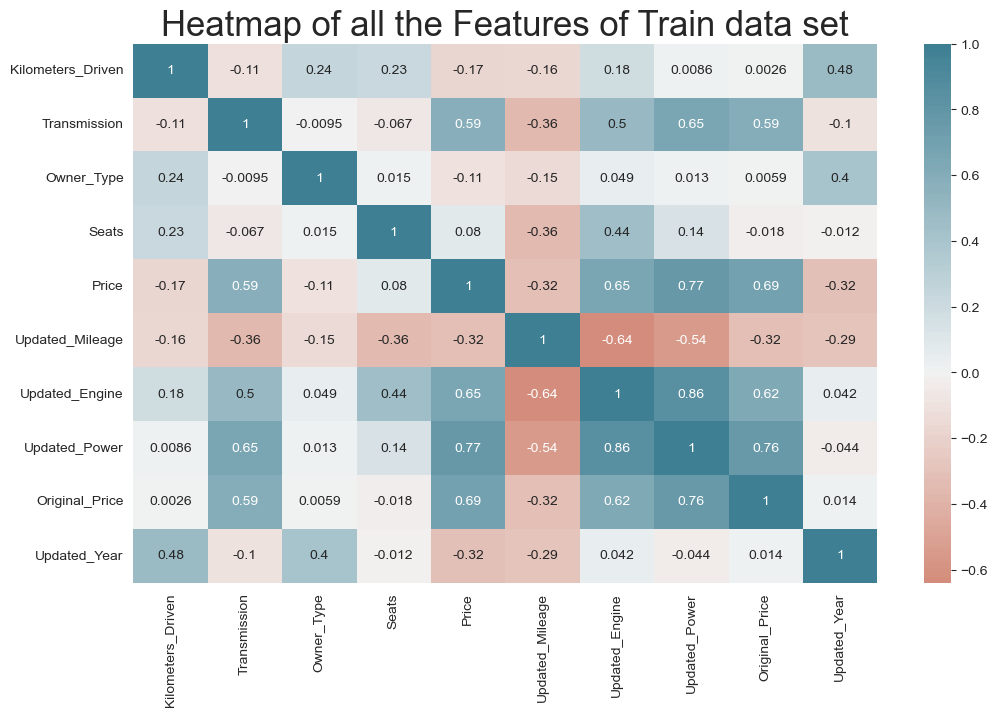

In [29]:
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (12,7))

#Dựng biểu đồ tương quan
sns.heatmap(df_train.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, center = 0, );
plt.title("Heatmap of all the Features of Train data set", fontsize = 25);

In [30]:
#phân X y
X = train_set.drop(columns=['Price'], axis=1)
y = train_set.loc[:,['Price']]

In [31]:
from sklearn.preprocessing import MinMaxScaler
X[['Kilometers_Driven', 'Updated_Mileage']] = MinMaxScaler().fit_transform(X[['Kilometers_Driven', 'Updated_Mileage']]) 

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [33]:
#tìm giá trị n phù hợp
L=[];
Error=[];

for i in range(3,15,2):
    M = [];
    knn = KNeighborsRegressor(n_neighbors = i)
    knn_reg = knn.fit(X_train, y_train)
    y_pred = knn_reg.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    M.append(i)
    M.append(rmse)
    L.append(M)
    Error.append(mse)

Text(0, 0.5, 'Error Rate')

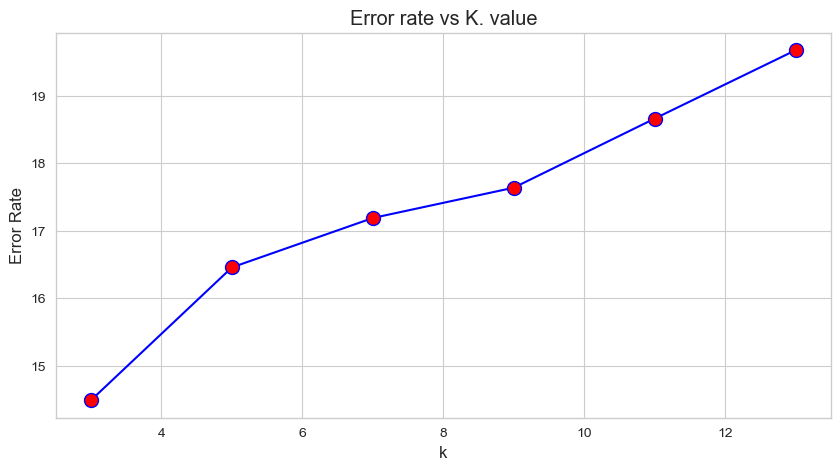

In [34]:
plt.figure(figsize=(10,5))
plt.plot(range(3,15,2), Error, color = 'blue', marker = 'o', markerfacecolor = 'red', markersize = 10)

plt.title('Error rate vs K. value')
plt.xlabel('k')
plt.ylabel('Error Rate')

In [35]:
min = L[0];
for i in range(len(L)):
    if L[i][1] < min[1]:
        min = L[i];
n = min[0];
print(n);

3


In [39]:
#models
models = {
    'Linear Regression': LinearRegression(),
    'K Nearest Neighbor': KNeighborsRegressor(n_neighbors = n),
    'Random Forest Regressor': RandomForestRegressor(n_estimators = 100, criterion='squared_error', random_state=1, n_jobs=-1),
    'Decision Tree Regressor': DecisionTreeRegressor()
}

In [48]:
#phương thức thử từng model
def modelTraining(models, X_train, X_test, y_train, y_test):
    
    #mảng điểm để visualization
    model_scores = {}
    
    #thực hiện train, test và score
    for name, model in models.items():
        
        md = model
        reg = md.fit(X_train, y_train.values.ravel())
        y_pred= reg.predict(X_test)
        score = r2_score(y_pred, y_test)
        model_scores[name] = score 

        #in
        print(name)
        print("Train accuracy: ", md.score(X_train, y_train))
        print("Test accuracy: ", md.score(X_test, y_test))
        print('Mean Absolute Error      : ', mean_absolute_error(y_test, y_pred))
        print('Mean Squared  Error      : ', mean_squared_error(y_test, y_pred))
        print('Root Mean Squared  Error : ', np.sqrt(mean_squared_error(y_test, y_pred)))
        print('R Squared Error          : ', score, "\n")
        
        # Gộp X_test với y_pred để hiển thị dạng bảng
        results_df = X_test.copy()
        results_df['Predicted Price'] = y_pred
        pd.set_option('display.max_rows', None)
        print("Data with Predicted Values:")
        print(results_df.head(10), "\n")  # In 10 hàng đầu tiên
        
    return model_scores

In [49]:
#train model
model_scores = modelTraining(models, X_train, X_test, y_train, y_test)

Linear Regression
Train accuracy:  0.7691710240108586
Test accuracy:  0.8024937778149714
Mean Absolute Error      :  2.7886917074542272
Mean Squared  Error      :  23.260373638229677
Root Mean Squared  Error :  4.822900956709527
R Squared Error          :  0.7419455992250039 

Data with Predicted Values:
      Kilometers_Driven  Transmission  Owner_Type  Seats  Updated_Mileage  \
1222           0.130376             0           1    8.0         0.359273   
3607           0.133024             1           2    5.0         0.350030   
2224           0.076090             0           1    5.0         0.703339   
2741           0.149697             0           2    5.0         0.587358   
3148           0.037157             1           1    5.0         0.487776   
1822           0.021526             0           1    5.0         0.754919   
237            0.067526             0           1    5.0         0.518784   
3100           0.035073             0           2    5.0         0.530710   
3

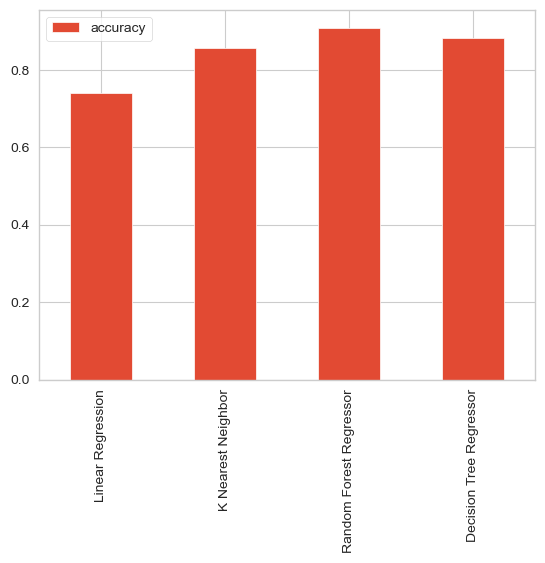

In [50]:
#so sánh score bằng visualization
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot(kind='bar');